# Dataset analysis 

In [1]:
import SimpleITK as sitk
import numpy as np
import pandas as pd
import os.path
import matplotlib.pyplot as plt
import math

import tikzplotlib

plt.style.use("seaborn")


In [2]:
base_path = os.path.abspath('.')
graphs_path = os.path.join(base_path, 'Analysis_graphs')

## xVerSeg dataset

[link](http://lit.fe.uni-lj.si/xVertSeg/database.php)



| Release date | Dataformat | number of scans |
|:-----|----------:|----------|
| OCT 5, 2015  | mhd        | 25              | 



In [3]:
data_folder = os.path.join(base_path, 'xVertSeg')
metadata_file = os.path.join(data_folder, 'metadata.csv')
metadata = pd.read_csv(metadata_file, sep=',', index_col=0)
metadata['x_dim'] = metadata.X * metadata.ΔX
metadata['y_dim'] = metadata.Y * metadata.ΔY
metadata['z_dim'] = metadata.Z * metadata.ΔZ

In [4]:
metadata

,Name,Group,Precision(bits),X,Y,Z,ΔX,ΔY,ΔZ,Gender,Age,x_dim,y_dim,z_dim
ID,,,,,,,,,,,,,,
1,image001,Data1,16,1024,1204,200,0.41362,0.41362,1.4506,F,69,423.54688,497.99848,290.1200
2,image002,Data1,16,1024,1024,250,0.43207,0.43207,1.2895,F,40,442.43968,442.43968,322.3750
3,image003,Data1,16,1024,1024,340,0.54070,0.54070,1.1924,F,60,553.67680,553.67680,405.4160
4,image004,Data1,16,1024,1024,170,0.42254,0.42254,1.2837,F,78,432.68096,432.68096,218.2290
5,image005,Data1,16,1024,1024,181,0.49629,0.49629,1.8919,M,77,508.20096,508.20096,342.4339
6,image006,Data1,16,1024,1024,100,0.28860,0.28860,1.6686,F,83,295.52640,295.52640,166.8600
7,image007,Data1,16,1024,1024,180,0.47433,0.47433,1.7593,M,56,485.71392,485.71392,316.6740
8,image008,Data1,16,512,512,218,0.80273,0.80273,1.1215,M,79,410.99776,410.99776,244.4870
9,image009,Data1,16,1024,1024,230,0.39381,0.39381,1.1052,M,78,403.26144,403.26144,254.1960


In [5]:
metadata_g1 = metadata[metadata.Group == 'Data1']

In [6]:
title = 'xVertSeg dataset\n'

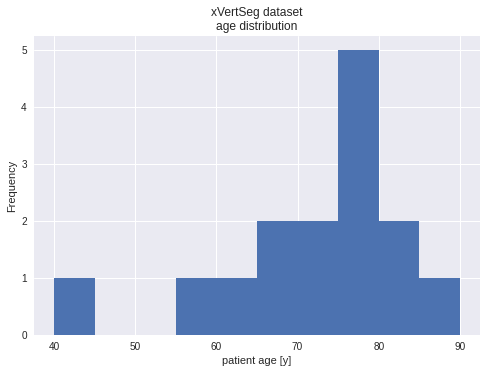

In [7]:
ax = metadata_g1['Age'].plot.hist(title=title + 'age distribution')
ax.set_xlabel('patient age [y]')

tikzplotlib.save(os.path.join(graphs_path,'xVertSeg_age.tex'))

<AxesSubplot:ylabel='Frequency'>

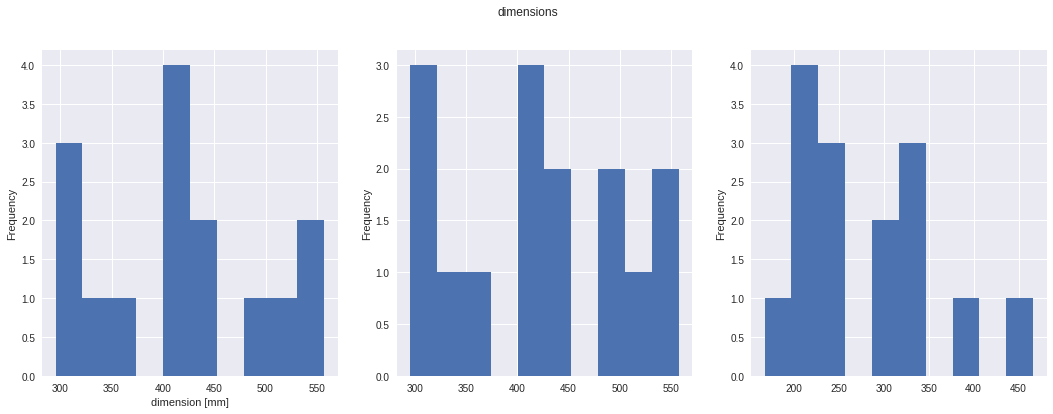

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,6))
fig.suptitle('dimensions')

metadata_g1.x_dim.plot.hist(ax=axes[0])
axes[0].set_xlabel('dimension [mm]')
metadata_g1.y_dim.plot.hist(ax=axes[1])
metadata_g1.z_dim.plot.hist(ax=axes[2])
axes[0].set_xlabel('dimension [mm]')

In [14]:
image_name = os.path.join(data_folder, 'Data1', 'images', 'image002.mhd')
itkimage = sitk.ReadImage(image_name)
arr = sitk.GetArrayFromImage(itkimage)
print(f'SimpleITK image size : {itkimage.GetSize()} and the numpy array : {arr.shape}')


SimpleITK image size : (1024, 1024, 250) and the numpy array : (250, 1024, 1024)


In [ ]:
mask_image = np.zeros_like(mask, dtype=np.uint8)
mask_image[np.where(mask==240)] = 250
mask_image

In [ ]:
_=stack_2d(mask==240, dim=0, start=150, show_every=2)